In [1]:
import pandas as pd
import re

### Part A

In [2]:
#Read in data
emergencies = pd.read_csv("data/emergency.csv", header=None, names = ['narrative'])

narratives = emergencies['narrative']
narratives

0       10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1                75YOF WITH LAC TO FINGER FROM METAL CAN 
2                8YOF FRACTURED FINGER FELL OFF HER BIKE 
3       9 YOM TACKLED DURING FOOTBALL PRACTICE.  DX: C...
4       PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...
                              ...                        
9995    RT HIP STRAIN.9YOM WAS PLAYING FOOTBALL AND IN...
9996    16 MO MALE FELL AND HIT HEAD ON A TRAIN TABLE....
9997        RAN INTO TABLE, HIT FACE DX: FACIAL CONTUSION
9998         81YOF-HUMERUS FX-FELL DOWN 3-4 STEPS-@ HOME 
9999    30YOM PUSHING TRASH DOWN INTO A GARBAGE CAN WI...
Name: narrative, Length: 10000, dtype: object

In [3]:
#Return longest and shortest narratives

print(narratives.str.len().max()) #longest 
print(narratives.str.len().min()) #shortest

143
17


### Part B

In [4]:
fractures = [frac for frac in narratives if re.search(r'FRACT*?|FX.?', frac)]

fractures

['10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL ',
 '8YOF FRACTURED FINGER FELL OFF HER BIKE ',
 '12YOF FELL DOWN STAIRS DX: FX RADIUS',
 '77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING ANKLE INJ DX; ANKLE FX',
 '34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A DOG,TRIPPED ON SOMETHING -FELL FORWARD     DX FX DISTAL TIBIA & FIBULA',
 'FINGER FX. 20 YOM INJURED FINGER WHEN PLAYING BASKETBALL ',
 '46YOM W/CERVICAL SPINE & LUMBAR TP FXS 2/2 JUMPING 8-10 FT FROM WINDOW WHEN POLICE ENTERED HIS APT. SLID DOWN HILL. NO LOC. +COCAINE.+ BENZOS',
 'RT FIBULA FX.55YOM FELL DOWN A LADDER. ',
 '10 YO FEMALE CAUGHT FINGER IN A DOOR AT SCHOOL.  DX FX ',
 '15 YOM FELL OFF OF BIKE. DX:  L FOREARM FX.',
 'L1 COMPRESSION FX.87YOF FELL ON THE FLOOR. ',
 '6 YO MALE PLAYING FOOTBALL AND BENT PINKY BACK.  DX FX ',
 '41YO HISP MALE POKED R INDEX FINGER WITH A SCREWDRIVER DX CLOSED FRACTURE OF HAND, FELON',
 '5 YR M FELL OFF FENCE;DX FRACTURED ELBOW ',
 'FELL AND INJURED R ANKLE AT SKATE RINK   FRACTURE

In [5]:
len(fractures) # get number of narratives 

1524

### PART C

In [6]:
fracture_str = ' '.join(fractures)
fracture_types = re.findall(r'FEMURS?|ARMS?|WRISTS?|LEGS?|FINGERS?|PINK+|ELBOWS?|HIPS?|F[OE]{2}T|SKULL|ANKLES?|FOREARMS?', fracture_str)

fracture_types

['SKULL',
 'FINGER',
 'ANKLE',
 'ANKLE',
 'FINGER',
 'FINGER',
 'FINGER',
 'FOREARM',
 'FOOT',
 'PINK',
 'FINGER',
 'ELBOW',
 'ANKLE',
 'ANKLE',
 'ELBOW',
 'FOOT',
 'HIP',
 'HIP',
 'HIP',
 'ARM',
 'FOREARM',
 'HIP',
 'HIP',
 'FEMUR',
 'ELBOW',
 'ELBOW',
 'ARM',
 'ARM',
 'FOREARM',
 'FEMUR',
 'SKULL',
 'WRIST',
 'FOOT',
 'FOREARM',
 'ARM',
 'ARM',
 'LEG',
 'ARM',
 'ELBOW',
 'FOOT',
 'ANKLE',
 'FOOT',
 'ANKLE',
 'FINGER',
 'FOOT',
 'FINGER',
 'FINGER',
 'HIP',
 'HIP',
 'ANKLE',
 'ANKLE',
 'ANKLE',
 'ARMS',
 'FOREARM',
 'FOOT',
 'FOOT',
 'FOOT',
 'ANKLE',
 'WRIST',
 'FOOT',
 'WRIST',
 'ANKLE',
 'FOOT',
 'FOOT',
 'WRIST',
 'FOOT',
 'FOOT',
 'FOOT',
 'HIP',
 'FEET',
 'WRIST',
 'HIP',
 'HIP',
 'SKULL',
 'ANKLE',
 'LEG',
 'ANKLE',
 'LEG',
 'FINGER',
 'FINGER',
 'FOREARM',
 'FOOT',
 'ANKLE',
 'LEG',
 'FEET',
 'LEG',
 'WRIST',
 'LEG',
 'HIP',
 'ANKLE',
 'FINGER',
 'FINGER',
 'WRIST',
 'FOOT',
 'FOREARM',
 'FINGER',
 'HIP',
 'HIP',
 'ELBOW',
 'FINGER',
 'FINGER',
 'FINGER',
 'FINGER',
 'FOOT',
 

In [7]:
len(fracture_types)

1361

In [8]:
fracture_types = [word for word in fracture_types if re.sub(r'.+S$', '', word)]

len(fracture_types)



1347

In [9]:
[word for word in fracture_types if re.findall(r'S$', word)] # no plurals

[]

In [10]:
types_df  = pd.Series(fracture_types)
types_df = types_df.value_counts().rename_axis('Parts').reset_index(name = 'Counts')
types_df

,Parts,Counts
0,FINGER,220
1,FOOT,212
2,WRIST,191
3,ANKLE,178
4,ARM,144
5,HIP,108
6,ELBOW,102
7,LEG,76
8,FOREARM,59
9,FEMUR,25


In [126]:
import matplotlib.pyplot as plt


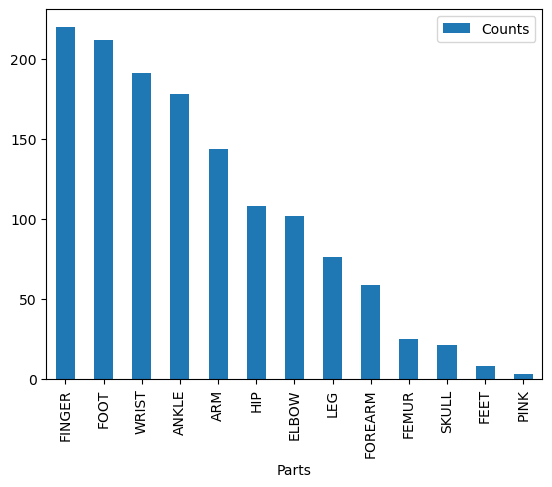

In [205]:
types_df.plot(x = 'Parts', kind='bar')
plt.show()

### PART D

In [55]:
narratives_male = [word for word in narratives if re.search(r'\b(\d+)\s*?(M|Y.?|MONTH|YEAR)\s*?(O|OLD)?\s*?(M|MALE)\b', word)]
narratives_male

['9 YOM TACKLED DURING FOOTBALL PRACTICE.  DX: CONCUSSION. ',
 'DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL & HIT NOSE & UPPER LIP. HAS SOME ABRASIONS BELOW NOSE',
 '21 MO MALE FELL AND HIT FACE ON WINDOW SILL.  DX FACE LACERATION ',
 '77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING ANKLE INJ DX; ANKLE FX',
 '34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A DOG,TRIPPED ON SOMETHING -FELL FORWARD     DX FX DISTAL TIBIA & FIBULA',
 'A 20 MONTH OLD MALE SWALLOWED A COIN DX  FOREIGN BODY IN ESOPHAGUS',
 '66YO M WAS RIDING BIKE AT RIVER PARK WHEN HIT A PATCH OF SAND & THEN HI T STEEL BRIDGE. SEPARATED FROM BIKE. DXROTATOR CUFF SPRAIN, PW ABD.',
 '2YR M BEAD IN NOSE;DX ASPIRATED OBJECT ',
 '51YOM BIBA AFTER FD SITTING ON THE STREETS WITH BEER BOTTLES AROUND HIM >>ETOH INTOX',
 '80YOM LAC EAR- FELL CHAIR ',
 '15 YO MALE PLAYING FOOTBALL AND HIT ON FACE  DX LIP LACERATION ',
 '12 YOM GETTING READY FOR PE CLASS AT SCHOOL TRIPPED AND FELL SUSTAINING A SPRAINED KNEE',
 '19YOM FELL DOWN 2-3 STAI

In [78]:
narratives_female = [word for word in narratives if re.search(r'\b(\d+)\s*?(M|Y.?|MONTH|YEAR)\s*?(O|OLD)?\s*?(F|FEMALE)\b', word)]
narratives_female

['10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL ',
 '75YOF WITH LAC TO FINGER FROM METAL CAN ',
 '8YOF FRACTURED FINGER FELL OFF HER BIKE ',
 '12YOF FELL DOWN STAIRS DX: FX RADIUS',
 '50 Y FEMALE FELL IN BATHTUB AT HOME CAUSING INJ TO FOREHEAD DX; FOREHEAD HEMATOMA',
 'DX SH PN/NECK PN: 75YOF WEEDING, FEL OVER HIT HEAD AND BACK ON PLASTIC YARD WASTED BIN; BOTHER SH HEURS, HIT BACK OF HEAD',
 '28 YO F, C/O RT HAND PAIN AFTER SMASHING IT IN THE DOOR, INCIDENT OCCUR RED AROUND 8 PM, DX HAND CONTUSION',
 '45YOF, ACC CUT LT INDEX FINGER ON A NEW KNIFE WHILCE SLICING A PIECE OF BREAD>>LAC',
 '80 Y/O F TAKED INSULIN. WASHING DISHES AND BEGAN TO FEEL WIERD. DX FEVE R, MILD HYPOGLYCEMIA',
 '5MOF ROLLED OFF OF PARENTS BED AND HIT HEAD ON FLOOR. NO LOC. DX CHI ',
 '21 YOF SUSTAINED A CONTUSION OF THE FACE BY FALLING AGAINST A SLIDE AT A PARK.',
 "2YOF INGESTED CHILDREN'S ***, FOUND EMPTY BOTTLE, 1 OZ ON FLOOR; INGEST ION",
 '7 YOF WRECKED BIKE; RIB PAIN DX:  RIB CONTUSION',
 '30YOF LBP AFT

In [96]:
ages_female = []
ages_male = []
for string in narratives_female:
    if re.search(r'\b(\d+)\s*?(M|MONTH)\s*?(O|OLD)?\s*', string):
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_female.append(float(tmp2)/12)
    else:
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_female.append(float(tmp2))

for string in narratives_male:
    if re.search(r'\b(\d+)\s*?(M|MONTH)\s*?(O|OLD)?\s*', string):
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_male.append(float(tmp2)/12)
    else:
        tmp = re.search(r'\b(\d+)', string)
        tmp2 = tmp.group(0)
        ages_male.append(float(tmp2))



NameError: name 'age' is not defined

In [138]:
male_df = pd.DataFrame(ages_male)
male_df['gender'] = 'M'

final_df = pd.DataFrame(ages_female)
final_df['gender'] = 'F'
final_df = pd.concat([male_df, final_df], ignore_index=True).rename(columns= {0: 'Age', 'gender': 'Gender'})

final_df = final_df.groupby('Gender').value_counts().reset_index(name= 'Count')
final_df['Age_Group'] = pd.cut(x=final_df['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 120])

final_df

,Gender,Age,Count,Age_Group
0,F,2.000000,129,"(0, 9]"
1,F,3.000000,106,"(0, 9]"
2,F,13.000000,88,"(9, 19]"
3,F,5.000000,83,"(0, 9]"
4,F,9.000000,79,"(0, 9]"
...,...,...,...,...
261,M,3.416667,1,"(0, 9]"
262,M,3.750000,1,"(0, 9]"
263,M,4.166667,1,"(0, 9]"
264,M,5.583333,1,"(0, 9]"


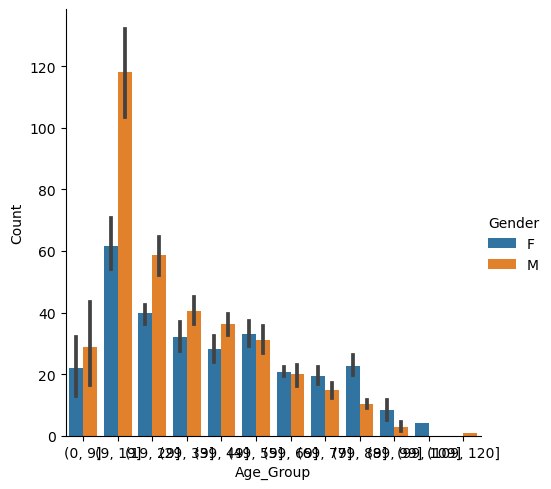

In [139]:
import seaborn as sns

sns.catplot(x = 'Age_Group', y = 'Count', hue= 'Gender', data = final_df, kind='bar')


In [136]:
final_df['Age_Group'] = pd.cut(x=final_df['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 120])